# 시계열 분석
***

## 시계열 자료 
- 시간의 흐름에 따라 관찰된 값
- 시계열 분석을 통해 미래의 값을 예측하고 경향, 주기, 계절성 드을 파악하여 활용
- ex> 주식, 실업률, 기후 데이터 등 다양
***

## 시계열 자료의 종류
### 비정상성 시계열 자료
- 시계열 분석 실시할 경우 다루기 어려운 자료로 대부분의 시계열 자료가 이에 해당
- 추세나 계절성이 있는 시계열

### 정상성 시계열 자료
- 비정상 시계열을 처리하여 다루기 수운 시계열 자료로 변환한 자료
- 백색잡음 시계열(관찰시간과 상관 없이 똑같은 시계열)

***
## 정상성

### 평균이 일정할 경우
- 모든 시점에 대해 일정한 평균을 지닌다.
- 평균이 일정하지 않은 시계열은 차분을 통해 정상화 할 수 있다.

### 분산이 일정
- 분산도 시점에 의존하지 않고 일정해야 한다.
- 분산이 일정하지 않을 경우 변환을 통해 정상화 한다.

### 공분산도 단지 시차에만 의존하고 실제 특정 시점 t, s에는 의존하지 않는다.

#### 차분
- 일반차분 : 바로 전 시점의 자료를 빼는 방법
- 계절차분 : 여러 시점 전의 자료를 빼는 방법으로 주로 계절성을 갖는 자료를 정상화하는데 사용한다.
***
### 정상시계열의 특징
- 정상 시계열은 어떤 시점에서 평균과 분산 그리고 특정한 시차의 길이를 갖는 자기공분산을 측정하더라도 동일한 값을 갖는다.
- 정상 시계열은 항상 그 평균값으로 회귀하려는 경향이 잇으며 그 평균값 주변에서의 변동은 대체로 일정한 폭을 갖는다.
- 정상 시계열이 아닌 경우 특정 기간의 시계열 자료로부터  얻은 정보를 다른 시기로 일반화 할 수 없다.
***
## 시계열자료 분석 방법

### 분석방법
- 수학적 이론 모형 : 회귀분석(계량경제)방법, Box-Jenkins 방법
- 직관적 방법 : 지수평활법, 시계열 분해법으로 시간에 따른 변동이 느린 데이터 분석에 활용
- 장기예측 : 회귀분석방법 활용
- 단기예측 : Box-Jenkins 방법, 지수평활법, 시계열 분해법 활용

### 자료 형태에 따른 분석 방법
#### 일변량 시계열 분석
- Box-Jenkins(ARMA), 지수평활법, 시계열 분해법 등이 있다.
- 시간(t)을 설명변수로 한 회귀모형으로 주가, 소매물가지수 등 하나의 변수에 관심을 갖는 경우의 시계열 분석

#### 다중 시계열 분석
- 계량 경제 모형, 전이함수 모형, 개입분석, 상태공간 분석, 다변량 ARIMA 등
- 여러개의 시간(t)에 따른 변수들을 활용하는 시계열 분석

### 이동평균법
#### 이동평균법의 개념
- 과거로부터 현재까지의 시계열 자료를 대상으로 일정기간별 이동평균을 계산하고 이들의 추세를  파악하여 다음 기간을 예측하는 방법
- 시계열자료에서 계절변동과 불규칙변동을 제거하여 추세변동과 순환변동만 가진 시계열로 변환하는 방법으로도 사용됨.

$F_{n + 1}$ = $1 \over m$$(Z_{n} + Z_{n-1} + ... +Z_{n-m+1})$ = $1\over m$$\sum_{t}^nZ_{t}$,    $t = n - m + 1$
- m은 이동평균 기간이고 $Z_{n}$은 가장 최근 시점의 데이터
- n개의 시계열 데이터를 m기간으로 이동평균하면 n-m+1개의 이동평균 데이터가 생성된다.



In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('temps.csv') # ADP 실제 문제

In [3]:
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
data.month = ['0'+str(x) if len(str(x)) < 2 else str(x) for x in data.month]
data.day = ['0'+str(x) if len(str(x)) < 2 else str(x) for x in data.day]

In [5]:
data['datetime'] = data.year.astype(str) + '-' +  data.month.astype(str) + '-' + data.day.astype(str)
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
data['shift_1'] = data.actual.shift(1)
data['shift_2'] = data.actual.shift(2)

실제로 lag 값과 temp_2, temp_1 값이 매칭이 되는지 확인

In [7]:
lag1 = data[['shift_1', 'temp_1']]

In [8]:
lag1['OX'] = lag1.shift_1 - lag1.temp_1

In [9]:
lag1.OX.unique()

array([ nan,   0.,  -1., -49.])

In [10]:
lag2 = data[['shift_2', 'temp_2']]

In [11]:
lag2['OX'] = lag2.shift_2 - lag2.temp_2

In [12]:
lag2.OX.unique()

array([ nan,   0.,   4.,  -1., -49.])

lag1과 lag2 값 비교 결과 맞지 않는 값이 존재해 데이터의 무결성이 위배된다. 따라서 분석에서 해당 칼럼(temp_1, temp_2)은 제외한다.

In [13]:
y = data['actual']
y1dif = data['actual'].diff(periods = 1).dropna()

result = adfuller(y)
print("원 데이터의 ADF 값 : {}".format(result[0]))
print('원 데이터의 P-value : {}\n'.format(result[1]))

result1 = adfuller(y1dif, autolag = None)
print("1차 차분 데이터의 ADF 값 : {}".format(result1[0]))
print('1차 차분 데이터의 P-value : {}'.format(result1[1]))

원 데이터의 ADF 값 : -1.3862452489150456
원 데이터의 P-value : 0.5888522670302699

1차 차분 데이터의 ADF 값 : -6.370863301602145
1차 차분 데이터의 P-value : 2.3469825265354642e-08


1차 차분이 필요하다.

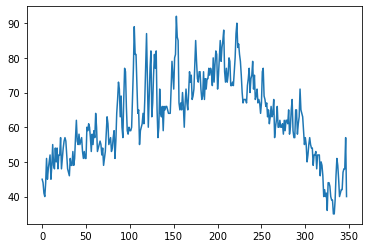

In [14]:
plt.plot(data['actual'])
plt.show()

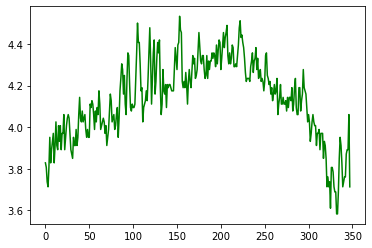

In [15]:
plt.plot(np.log1p(data['actual']), color = 'g')
plt.show()

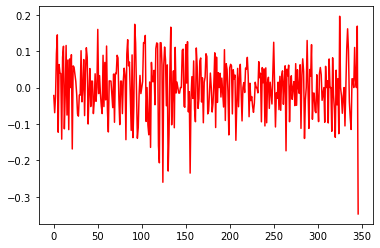

In [16]:
plt.plot(np.diff(np.log1p(data['actual'])), color = 'r')
plt.show()

로그 변환 후 차분을 진행하면 정상시계열을 만족한다.

아래 RollingOLS를 사용했지만 방법이 자세하지 않아 skip하는 것이 나을 듯하다.

In [118]:
factor = data[['month', 'average', 'forecast_noaa', 'forecast_acc', 'actual']]

In [119]:
from statsmodels.regression.rolling import RollingOLS

In [120]:
factor = data[['average', 'forecast_noaa', 'forecast_acc']]

In [121]:
endog = data['actual'].astype('float64')
exog = sm.add_constant(factor)

In [122]:
rols = RollingOLS(endog, exog, window = 10)
rres = rols.fit()

In [123]:
params = rres.params

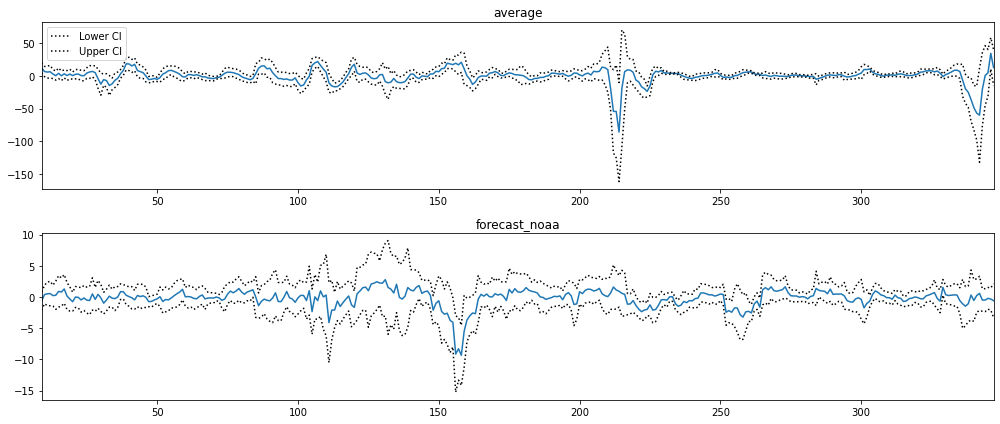

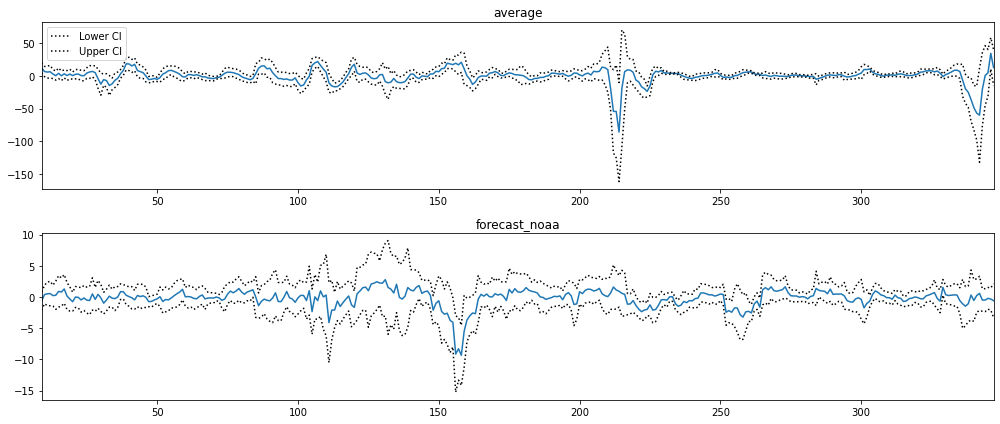

In [124]:
rres.plot_recursive_coefficient(variables = factor.columns[:-1], figsize=(14,6))

이동평균법 사용시 뒤의 n개의 데이터를 예측하고 싶으면 window = n 적용

## 자동 회귀 통합 모델(VAR)

- 여러 시계열 변수로 구성되며 예측에 매우 유용한 도구
- 자동 회귀(AR) 모형의 확장 버전

In [378]:
target = data[['average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'actual']]
target.index = data['datetime']

In [379]:
target.head()

,average,forecast_noaa,forecast_acc,forecast_under,actual
datetime,,,,,
2016-01-01,45.6,43,50,44,45
2016-01-02,45.7,41,50,44,44
2016-01-03,45.8,43,46,47,41
2016-01-04,45.9,44,48,46,40
2016-01-05,46.0,46,46,46,44


앞서 로그변환 후 차분이 정상성을 만족했기 때문에 로그 변환 후 1차 차분을 진행한다.

In [380]:
target['lagged_1'] = np.log(target.actual).diff()

In [381]:
target.dropna(inplace = True)

In [382]:
adfuller_test = adfuller(target['lagged_1'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -9.6935366265145
p-value: 1.1199213887391588e-16


0에 수렴하므로 정상성을 만족한다.

In [383]:
from statsmodels.tsa.api import VAR

In [384]:
train = target.iloc[:-31].drop('actual', axis = 1)
test = target.iloc[-31:].drop('actual', axis = 1)

In [385]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,10):
    results = forecasting_model.fit(p)
    results_aic.append(results.aic)

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


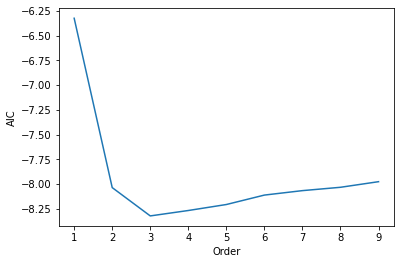

In [386]:
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

가장 낮은 AIC 점수는 3일 때이고 그 이후 p가 커짐에 따라 증가 추세를 보인다. 따라서 VAR모델의 최적 순서는 3으로 선택한다.


In [387]:
results = forecasting_model.fit(3)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 26, May, 2021
Time:                     23:38:05
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -7.36523
Nobs:                     313.000    HQIC:                  -7.94009
Log likelihood:          -838.132    FPE:                0.000243041
AIC:                     -8.32273    Det(Omega_mle):     0.000189418
--------------------------------------------------------------------
Results for equation average
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.040473         0.033973            1.191           0.234
L1.average                1.419638         0.048286           29.400           0.000
L1.forecast_noaa         -0.002015        

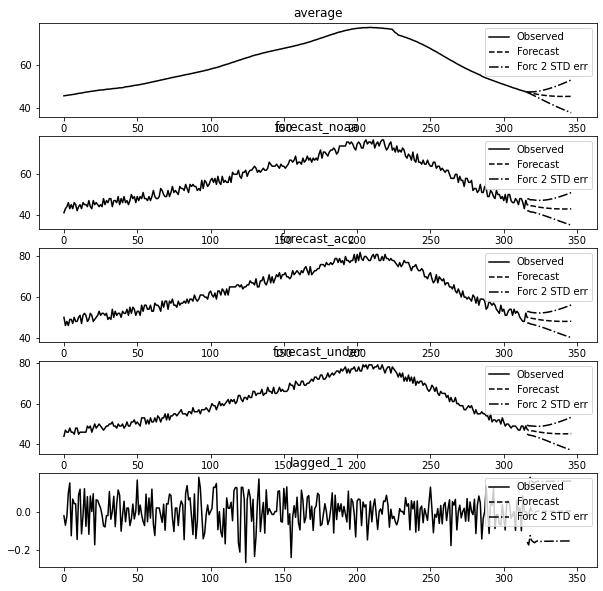

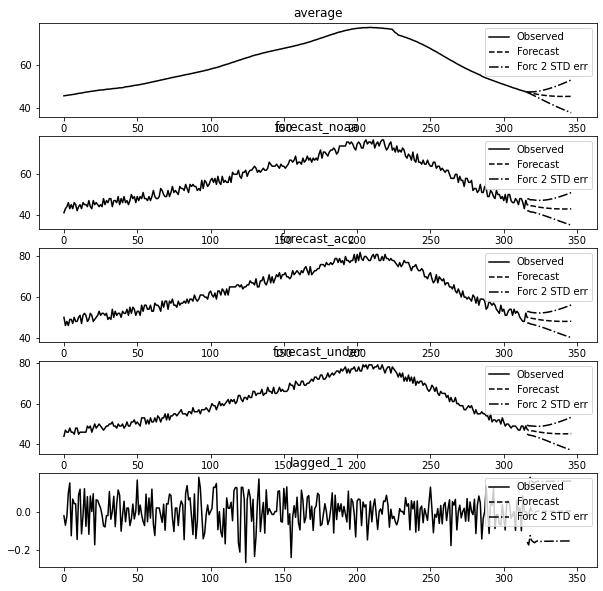

In [388]:
results.plot_forecast(31)

train 데이터로 한 달 후 예측

In [389]:
lag_order = results.k_ar # lagging order 수
v = train.values[-lag_order:]
pred = results.forecast(y = v, steps = 31)
forecast = pd.DataFrame(pred, index = test.index, columns= train.columns)
forecast.head()

,average,forecast_noaa,forecast_acc,forecast_under,lagged_1
datetime,,,,,
2016-12-01,47.405217,44.921039,49.921291,47.382679,-0.014312
2016-12-02,47.235349,44.864157,50.085233,46.813248,-0.025396
2016-12-03,47.072877,44.402843,49.679052,46.827501,0.025903
2016-12-04,46.920184,44.400988,49.519106,46.660918,0.003902
2016-12-05,46.770443,44.314340,49.433397,46.618064,-0.002353


In [394]:
exp_pred = np.exp(forecast.lagged_1.cumsum()) # 로그 변환했기 때문에 차분을 다시 복원후 지수 변환 실행

In [399]:
forecast_error = [test['lagged_1'][i] - exp_pred[i] for i in range(len(test))]
bias = sum(forecast_error) * 1 / len(test)
print(f'Bias : {bias}%')

Bias : -1.0020918430766248%


실제 예측값 구하기

In [416]:
prediction = train.iloc[-1, -2] * exp_predb

In [418]:
print(f'RMSE = {np.sqrt(mean_squared_error(target.loc["2016-12-01":, "actual"], prediction))}')

RMSE = 7.194528559690525


***
### 지수평활법
#### 지수평활법의 개념
- 모든 시계열 자료를 사용하여 평균을 구하며 시간의 흐름에 따라 최근 시계열에 더 많은 가중치를 부여하여 미래를 예측하는 방법
- $F_{n+1} = \alpha$$Z_{n} + (1-\alpha)F_{n}$ = $\alpha Z_{n}$ + $(1-\alpha$)$[\alpha Z_{n-1} + (1 - \alpha)F_{n-1}]$<br> = $\alpha Z_{n} + \alpha(1-\alpha)Z_{n-1} + (1 - \alpha)^2F_{n-1}$ <br> = $\alpha Z_{n} + \alpha(1 - \alpha)Z_{n-1} + (1 - \alpha)^2[\alpha Z_{n-2} + (1 - \alpha)F_{n-2}]$ <br> = $\alpha Z_{n} + \alpha(1 - \alpha)Z_{n-1} + \alpha(1 - \alpha)^2Z_{n-2} + \alpha(1 - \alpha)^3Z_{n-3} + ....$

- 여기서 $F_{n+1}$은 $n$시점 다음의 예측값, $\alpha$는 지수평활계수, $Z_{n}$은 $n$시점의 관측값이며 지수평활계수가 과거로 갈수록 지수형태로 감소하는 형태인 것을 확인할 수 있다.
#### 지수평활법의 특징
- 단기간에 발생하는 불규칙변동을 평활하는 방법
- 자료의 수가 많고 안정된 패턴을 보이는 경우 예측 품질이 높다.
- 지수평활법에서 가중치의 역할은 지수평활계수($\alpha$)이며 불규칙변동이 큰 시계열의 경우 지수평활계수는 작은 값을, 불규칙변동이 작은 시계열의 경우 큰 값의 지수평활계수를 적용한다.
- 지수평활계수는 예측오차(실제 관측치와 예측치 사이의 잔차제곱합)를 비교하여 예측오차가 가장 작은 값을 선택하는 것이 바람직하다.
- 지수평활계수는 과거로 갈수록 지속적으로 감소함
- 지수평활법은 불규칙변동의 영향을 제거하는 효과가 있으며 중기 예측 이상에 주료 사용된다.(단, 단순지수 평활법은 장기추세나 계절변동이 포함된 시계열의 예측에는 적합하지 않음)


In [648]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [749]:
data = pd.read_csv('Bike_Sharing_Demand_Full.csv')

In [750]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [751]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data[['datetime', 'count']]
data.set_index('datetime', inplace = True)
data.head()

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1


In [753]:
data = data.asfreq('H', method = 'ffill')

In [762]:
tr = data.iloc[:1000]
te = data.iloc[1000:1200]

### SimpleExpSmooting
#### initialization_method
- estimated
- heuristic

In [763]:
fit1 = SimpleExpSmoothing(tr['count'], initialization_method = 'heuristic').fit(smoothing_level = 0.2, optimized = False)

In [785]:
fit1 = SimpleExpSmoothing(tr['count'], initialization_method = 'heuristic').fit(smoothing_level = 0.2, optimized = False)

In [764]:
forecast = fit1.forecast(len(te))

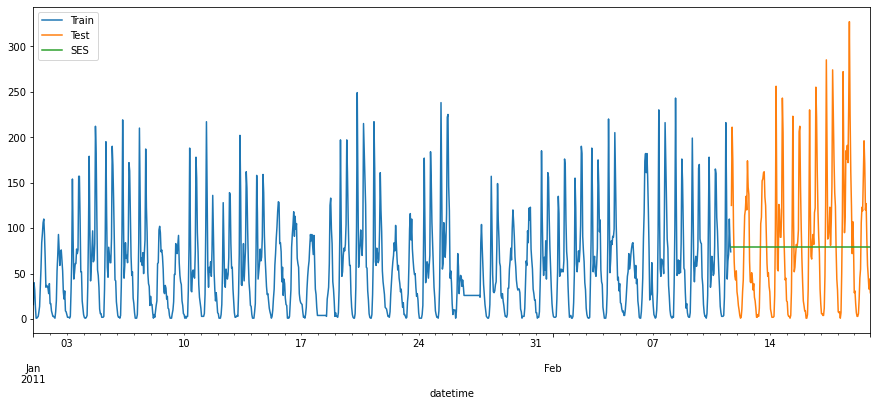

In [765]:
plt.figure(figsize = (15, 6))
tr['count'].plot(label = 'Train')
te['count'].plot(label = 'Test')
forecast.plot(label = 'SES')
plt.legend()
plt.show()

In [766]:
rmse = np.sqrt(mean_squared_error(te, forecast))

In [767]:
rmse

71.39072696956178

### Holt's Linear Trend Method

In [779]:
fit1 = Holt(np.asarray(tr['count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.05)

In [780]:
forecast = fit1.forecast(len(te))

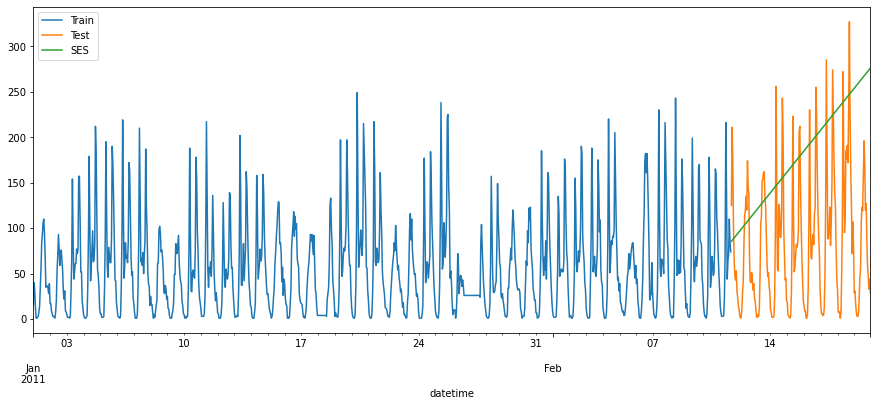

In [781]:
plt.figure(figsize = (15, 6))
tr['count'].plot(label = 'Train')
te['count'].plot(label = 'Test')
pd.Series(forecast, index = te.index).plot(label = 'SES')
plt.legend()
plt.show()

In [782]:
rmse = np.sqrt(mean_squared_error(te, forecast))

In [783]:
rmse

127.02559163711409

### Holt-Winters Method

In [797]:
fit1 = ExponentialSmoothing(np.asarray(tr['count']) ,seasonal_periods = 24 ,seasonal='add',).fit()

계절성 보이면 seasonal = 'add' 추가

In [798]:
forecast = fit1.forecast(len(te))

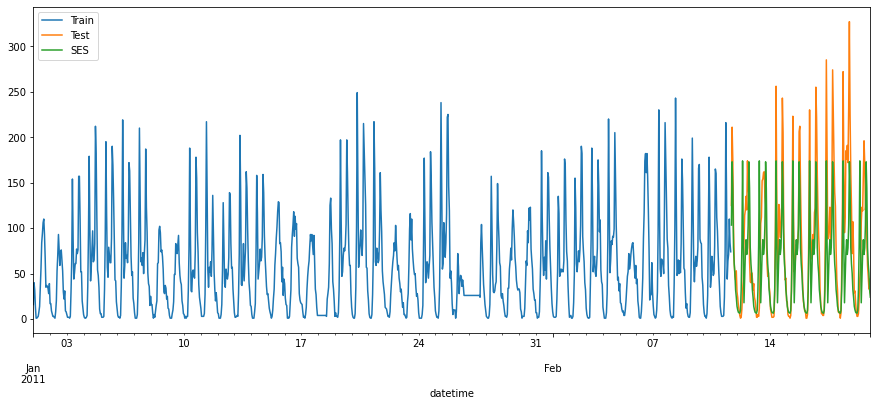

In [799]:
plt.figure(figsize = (15, 6))
tr['count'].plot(label = 'Train')
te['count'].plot(label = 'Test')
pd.Series(forecast, index = te.index).plot(label = 'SES')
plt.legend()
plt.show()

***
## 시계열 모형

### 자기회귀모형(AR 모형  / AutoRegressive Model)
- $p$ 시점 전의 자료가 현재 자료에 영향을 주는 모형
- $Z_{t} = \phi_{1}Z_{t-1} + \phi_{2}Z_{t-2} + ... + \phi_{p}Z_{t-p} + \alpha_{t}$
- AR(1) 모형 : $Z_{t} = \phi_{1}Z_{t-1} + \alpha_{t}$로 직전 시점 데이터로만 분석
- AR(2) 모형 : $Z_{t} = \phi_{1}Z_{t-1} + \phi_{2}Z_{t-2} + \alpha_{t}$로 연속된 3시점 정도의 데이터로 분석
- 자기상관함수(ACF)는 빠르게감소하고 부분자기함수(PACF)는 어느 시점에서 절단점을 가진다(ACF가 빠르게 감소하고 PACF가 $n$시점에서 절단점을 갖는 그래프가 있다면 $n-1$시점의 자료까지가 현재에 영향을 미치는 AR(n-1) 모형이라 볼 수 있다.).

### 이동평균모형(MA 모형 / Moving Average Model)
- 유한한 개수의 백색잡음의 결합이므로 언제나 정상성을 만족
- 1차 이동평균모형(MA1 모형)은 이동평균모형 중에서 가장 간단한 모형으로 시계열이 같은 시점의 백색잡음과 바로 전 시점의 백색잡음의 결합으로 이뤄진 모형
- $Z_{t} = \alpha_{t} - \phi_{1}\alpha_{t-1} - \phi_{2}\alpha_{t-2} - ... - \phi_{p}\alpha_{t-p}$
- 2차 이동평균모형(MA(2) 모형)은 바로 전 시점의 백색잡음과 시차가 2인 백색잡음의 결합으로 이뤄진 모형 : $Z_{t} = \alpha_{t} - \phi_{1}\alpha_{t-1}$
- AR 모형과 반대로 ACF에서 절단점을 가지고 PACF가 빠르게 감소

### 자기회귀누적이동평균모형(ARIMA(p, d, q) 모형 / AutoRegressive Integrated Moving Average Model)
- ARMIA 모형은 비정상시계열 모형이다.
- 차분이나 변환을 통해 AR모형, MA모형, 이 둘을 합친 ARMA 모형으로 정상화 할 수 있다.
- p는 AR 모형, q는 MA 모형과 관련이 있는 차수이다.
- 시계열 {$Z_{t}$}의 d번 차분한 시계열이 ARMA(p, q)모형이면 시계열{$Z_{t}$}는 차수가 p, d, q인 ARIMA모형, 즉 ARIMA(p,d,q) 모형을 갖는다고 한다.
- d = 0인 경우 ARMA(p,q)모형이라 부르고 이 모형은 정상성을 만족한다.
- p = 0인 경우 IMA(d,q)모형이라 부르고 d번 차분하면 MA(q) 모형을 따른다.
- q = 0인 경우 ARI(p,d)모형이라 부르고 d번 차분하면 AR(p) 모형을 따른다.
- acf,pacf를 통해 정상성을 확인할 수도 있지만, adf검정을 통해 확인할 수 있다.(통계적 방법)
#### 예시
- ARIMA(0,1,1)인 경우 1차분 후 MA(1) 활용
- ARIMA(1,1,0)인 경우 1차분 후 AR(1) 활용
- ARIMA(1,1,2)인 경우 1차분 후 AR(1), MA(2), ARMA(1,2) 중 선택 활용 : 이 경우 가장 간단한 모형을 선택하거나 AIC를 적용하여 점수가 가장 낮은 모형을 선정한다.

***
#### AR(p) = ARIMA(p, 0, 0)
#### MA(q) = ARIMA(0, 0, q)
#### ARMA(p, q) = ARIMA(p, 0, q)

***
#### ARIMA의 모수는 크게 3가지가 있다. AR모형의 Lag를 의미하는 p, MA모형의 Lag를 의미하는 q, 차분 횟수를 의미하는 d가 그것이다. 
- 통상적으로 p + q < 2, p * q = 0 인 값들을 많이 사용한다.
***
### 분해시계열
- 시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법으로 회귀분석적인 방법을 주로 사용한다.
- 분해식의 일반적 정의
<center>$Z_{t} = f(T_{t}, S_{t}, C_{t}, I_{t})$<center>
    
|요인 | 설명|
|---|---|
|$T_{t}$|경향(추세)요인으로 자료가 오르거나 내리는 추세, 선형, 이차식 형태, 지수적 형태 등|
|$S_{t}$|계절요인으로 요일, 월, 계절, 분기에 의한 변화 등 고정된 주기에 따라 자료가 변하는 경우|
|$C_{t}$|순환요인으로 경제적이나 자연적인 이유 없이 알려지지 않은 주기를 가지고 변화하는 자료|
|$I_{t}$| 불규칙요인으로 위의 세 가지 요인으로 설명할 수 없는 오차에 해당하는 요인|


    


***


***

## 정상 시계열 판단하는 방법
### 1) ACF & PACF 그래프 이용
                  
#### <font color = 'red'>ACF(Autocorrelation function)<font color = 'black'>
- 자기상관은 관측치 간의 시간 지연 함수로서 관측치 간의 유사성을 의미한다.
- Lag에 따른 관측치들 사이의 관련성을 측정하는 함수
- 플롯이 사인 함수 처럼 생겼는지 살펴봐야한다. 이러한 패턴은 시계열의 계절성에 대한 힌트이며 반복되는 패턴을 확인할 수 있다.
                  
#### <font color = 'red'>PACF(Partial Autocorrelation function) <font color = 'black'>
- k 이외의 모든 다른 시점 관측치의 영향력을 배제하고  $y_{t}$와 $y_{t-k}$ 두 관측치의 관련성을 측정하는 함수
    
#### 파란색 신뢰수준 안에 막대가 들어오는지 여부를 살펴봐야하기 떄문에 시각적인 판단에 의존해야한다. 따라서 통계적 검정 방법을 지향한다.
                  
### 2) 통계적 검정
                  

#### <font color = 'red'>ADF검정<font color = 'black'>
- ADF는 시계열의 안정성 여부를 확인하는데 이용된다.
- 귀무가설 : 시계열이 안정적이지 않다.
- 대립가설 : 시계열이 안정적이다.

< 입력 인수 >

* x : 시계열 자료
* maxlag : ADF 검정에 사용할 시차의 수. 디폴트 $12(관측치 수/100)^{1/4}$
* regression : 검정 사용할 모형. 
* 'nc': 결정론적 추세 없음. DF 검정
* 'c': 상수항만 사용
* 'ct': 상수항과 1차 추세 사용
* 'ctt': 상수항과 1차 추세, 2차 추세 사용
*  autolag : 검정 AR 모형의 차수를 자동 결정하는 알고리즘 {‘AIC’, ‘BIC’, ‘t-stat’, None}


< 반환값 >

* adf : 검정 통계량
* pvalue : MacKinnon(1994) 방식을 사용한 p-value 추정치
* usedlag : 사용된 시차의 수
* nobs : 분석에 자료의 수
* critical values : 1%, 5%, 10% 수준에 해당되는 검정 통계량의 값
- p < 0.05 인 경우; 데이터가 고정되어 있다.
- p > 0.05 인 경우; 데이터가 고정되어 있지 않다. p 값이 클수록 특정 추세 (다양한 평균) 또는 계절성이 있음을 나타낼 수 있다.

#### <font color = 'red'>KPSS 안정성 테스트<font color = 'black'>

- 시계열이 평균 or 선형 추세 주변에 고정되어 있는지 또는 단위 루트로 인해 고정되지 않은지 확인
- 원데이터에 적용하는 방법
- 귀무가설 : 시계열이 안정적이다
- 대립가설 : 시계열이 안정적이지 않습니다.
    
#### <font color = 'red'>Ljung-Box Q 방법<font color = 'black'>
- 잔차 검정에 적용하는 방법
- 귀무가설 : 해당 데이터의 잔차들이 자기 상관성이 없다.
- 대립가설 : 해당 데이터의 잔차들이 자기 상관성이 있다.
- 만약 잔차들이 자기 상관성이 없다면 원데이터가 정상성을 만족하는 것이다.

In [631]:
data = pd.read_csv('Unknown.csv')

In [632]:
data

,Timestamp,market-price
0,2020-05-23 00:00:00,9167.26
1,2020-05-24 00:00:00,9178.32
2,2020-05-25 00:00:00,8730.73
3,2020-05-26 00:00:00,8899.66
4,2020-05-27 00:00:00,8842.85
...,...,...
361,2021-05-19 00:00:00,42912.19
362,2021-05-20 00:00:00,36964.27
363,2021-05-21 00:00:00,40784.32
364,2021-05-22 00:00:00,37280.35


In [633]:
target = data.loc[351:365]
data = data.loc[:350]

In [634]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace = True)

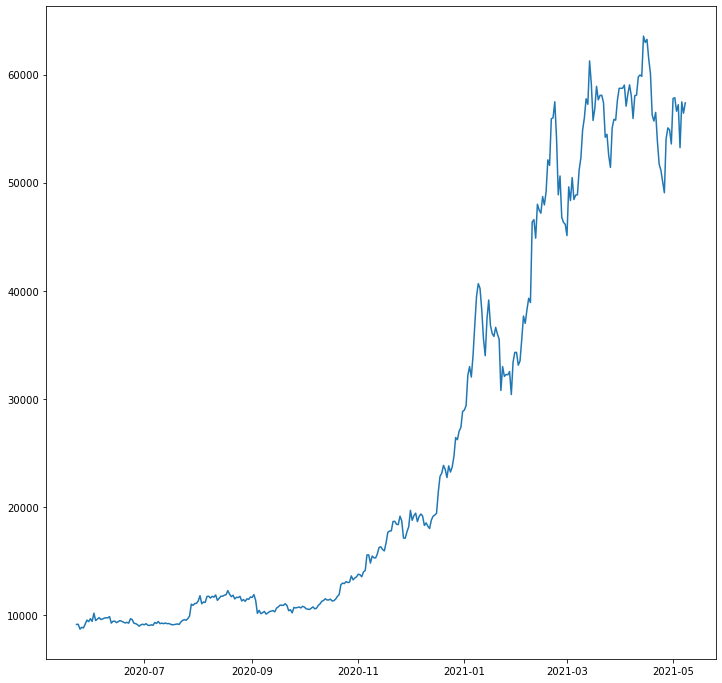

In [635]:
plt.plot(data['market-price'])
plt.show()

정상 시계열인지 함부로 판단하면 안된다. 평균과 분산이 일정해야 정상 시계열의 근거를 댈 수 있다. 근거를 제시하기 전에 시각화로 보여주는 것이 낫다.

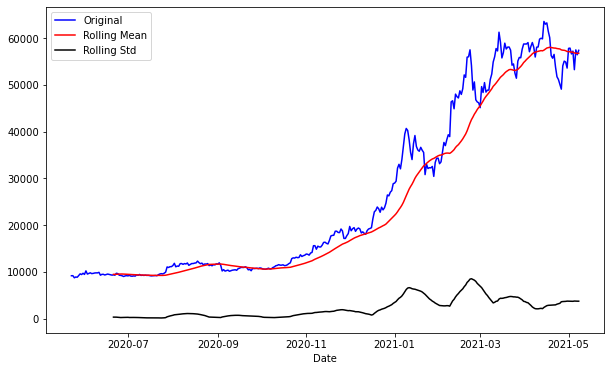

In [636]:
def plot_rolling(data, interval):
    
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show()
    
plot_rolling(data['market-price'], 30)

평균은 꾸준히 상승하다가 마지막에 하락하였다. 분산도 끝으로 갈수록 점점 오르는 것을 볼 수 있다.

따라서 해당 데이터는 정상성(stationary)을 만족하지 않는다고 볼 수 있다.

추세요인, 계절요인, 불규칙 요인은 아래와 같이 그리면 된다.

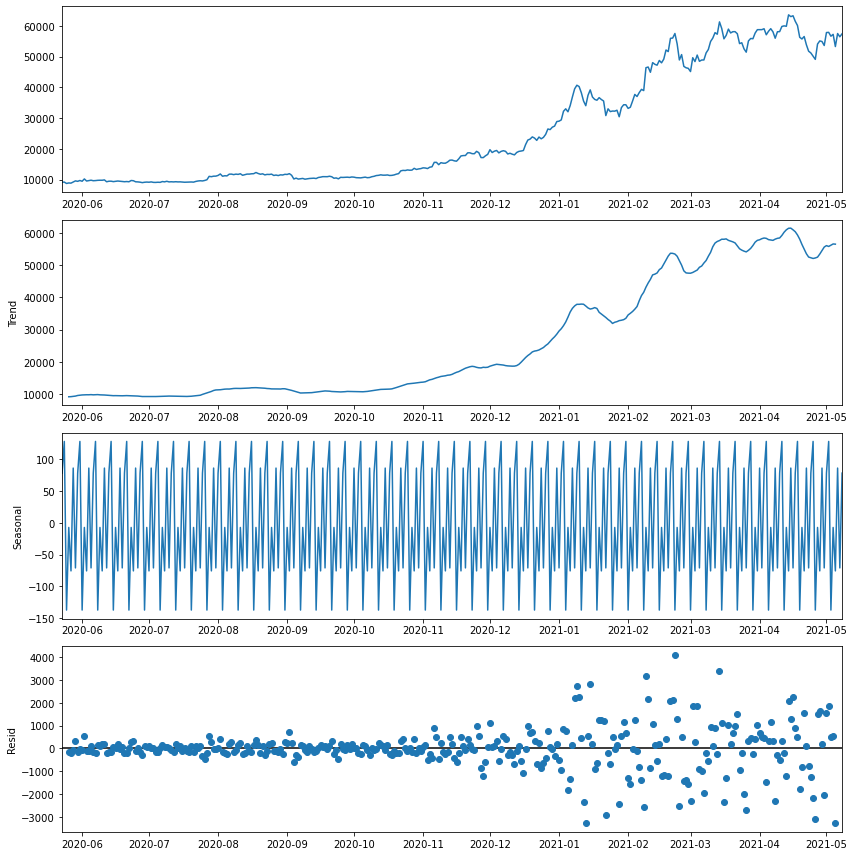

In [637]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = [12, 12]

result = seasonal_decompose(data, model='additive')
result.plot()
plt.show()

트렌드가 실제 데이터의 추세와 비슷한 것을 알 수 있다. 계절별로 주기성이 뚜렷한 것을 알 수 있다.
***
#### 1) ACF or PACF로 확인

In [427]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

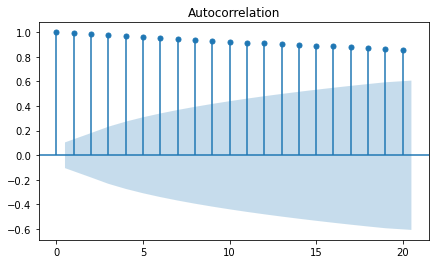

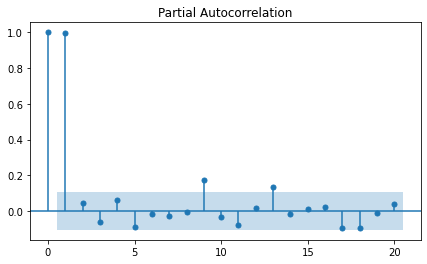

In [65]:
plt.rcParams['figure.figsize'] = (7, 4)
plot_acf(data['market-price'], lags = 20)
plot_pacf(data['market-price'], lags = 20)
plt.show()

|확률과정| ACF | PACF |
|---|---|---|
|AR(p) | 지수적으로 감소하거나 소멸하는 싸인함수 형태 | 시차 p이후에는 0으로의 절단형태|
|MA(q)| 시차 q이후에는 0으로의 절단형태 | 지수적으로 감소하거나 소멸하는 싸인함수 형태|
|ARMA(p, q) | 시차(q-p) 이후에는 지수적으로 감소하거나 소멸하는 싸인함수 형태 | 시차(p-q) 이후에는 지수적으로 감소하거나 소멸하는 싸인함수 형태|


PACF는 1의 Time Lag에서 약 1을 보이고 이후에 급격히 감소한다. 따라서 p = 1, q = 0이 적당하다고 추측할 수 있다.

적절한 차분 차수의 계산을 위해 1차 차분을 한 후 ACF 및 PACF를 다시 계산한다.

1차 차분 이후 ACF 및 PACF를 보면 시계열이 정상상태를 보이는 것으로 생각되므로 1차 차분만 진행한다. 따라서 본 데이터에는 ARIMA(5,1,0)을 사용하기로 한다.
***
#### 2) ADF Test

In [66]:
y = data['market-price']
y1dif = data['market-price'].diff(periods = 1).dropna()

result = adfuller(y)
print("원 데이터의 ADF 값 : {}".format(result[0]))
print('원 데이터의 P-value : {}\n'.format(result[1]))

result1 = adfuller(y1dif, autolag = None)
print("1차 차분 데이터의 ADF 값 : {}".format(result1[0]))
print('1차 차분 데이터의 P-value : {}'.format(result1[1]))

원 데이터의 ADF 값 : 0.13473790221004986
원 데이터의 P-value : 0.9683543304047967

1차 차분 데이터의 ADF 값 : -4.722156527923563
1차 차분 데이터의 P-value : 7.644717720154822e-05


1차 차분 이후 유의확률이 0에 근사하므로 차분을 하면 정상성이 있다고 볼 수 있다. 따라서 차수(d)는 1이다.

***
#### 3) KPSS Test

In [43]:
from statsmodels.tsa.stattools import kpss

In [44]:
statistic, p_value, n_lags, critial_values = kpss(data['market-price'])

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 1.8144047287141853
P-value : 0.01
num_lags : 17
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


차분 이전에 안정성 test 결과 유의확률이 유의수준 보다 낮아 귀무가설을 기가하고 '시계열이 안정적이지 않다.'라고 판단한다. 이후 1차 차분을 진행한후 재 검증을 실시한다.

In [45]:
statistic, p_value, n_lags, critial_values = kpss(data['market-price'].diff(periods = 1).dropna())

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 0.23814950753329198
P-value : 0.1
num_lags : 17
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


1차 차분 이후 검정 결과 귀무가설을 채택한다. 즉 '시계열이 안정적이다.'는 통계적으로 유의하다고 할 수 있으며 정상시계열로 판단한다.

In [67]:
diff_1 = data['market-price'].diff(periods = 1).iloc[1:]

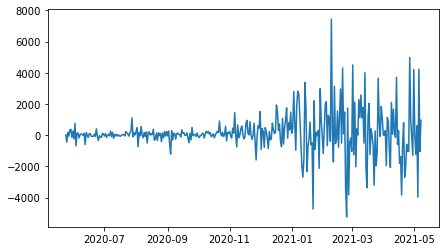

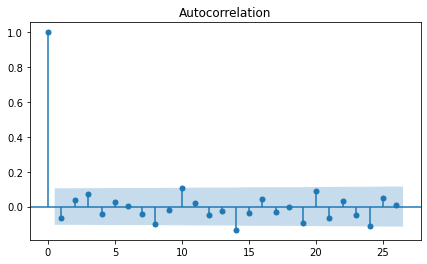

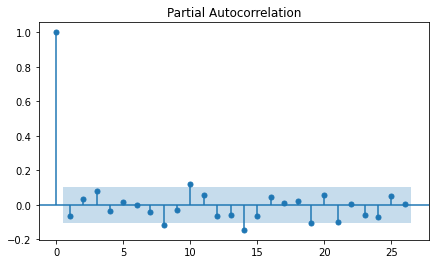

In [68]:
plt.plot(diff_1)
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

### Model Fitting

In [48]:
from statsmodels.tsa.arima_model import ARIMA, ARMA

model = ARIMA(data['market-price'], order = (0,1,0))
model_fit = model.fit(trend = 'c',full_output = True, disp = 1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                  350
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3006.226
Method:                           css   S.D. of innovations           1300.206
Date:                Tue, 25 May 2021   AIC                           6016.452
Time:                        08:50:19   BIC                           6024.168
Sample:                    05-24-2020   HQIC                          6019.523
                         - 05-08-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.7515     69.499      1.982      0.047       1.536     273.967


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [70]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(model_fit.resid, return_df=True)

,lb_stat,lb_pvalue
1,1.453433,0.227978
2,1.968823,0.373659
3,3.871655,0.275661
4,4.486219,0.344185
5,4.697421,0.453911
6,4.697635,0.583136
7,5.408090,0.610292
8,9.026053,0.340103
9,9.188459,0.420063
10,13.209903,0.212172


Ljung-Box test는 Fitting 이후 잔차가 Lag에 따라 correlated 되어 있는지 판단하는 것으로 잔차가 백색잡음을 따르는지 판단하는 테스트이다. 따라서 Ljung-Box test의 귀무가설은 "잔차가 백색잡음을 따른다."이고 유의확률이 낮으면 귀무가설을 기각하고 백색잡음을 따르지 않아 각 시간대별 잔차가 correlated 되어있다고 판단할 수 있다.

검정 결과 p-값이 0.084로 귀무가설을 채택하고 '잔차가 백색잡음을 따른다.'고 할 수 있다.

In [50]:
target.set_index('Timestamp', inplace = True)

In [51]:
prediction = model_fit.forecast(len(target))
predicted_value = prediction[0]
predicted_ub = prediction[2][:,1]
predicted_lb = prediction[2][:,0]
predict_index = pd.to_datetime(target.index)

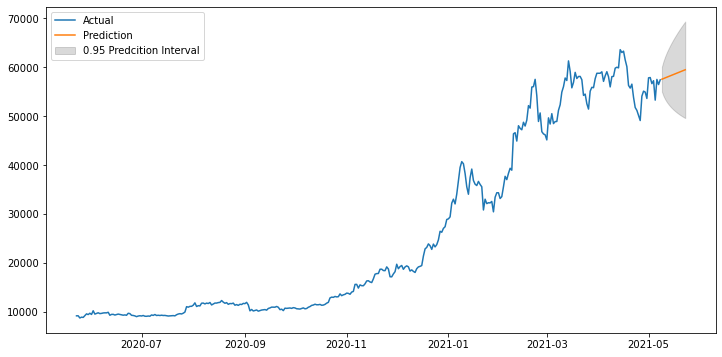

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(data['market-price'],label = 'Actual')
ax.plot(predict_index, predicted_value, label = 'Prediction');
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = .15, label = '0.95 Predcition Interval')
ax.legend(loc='upper left');
plt.show()

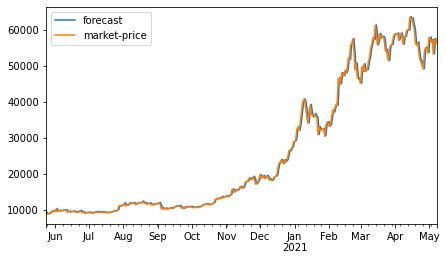

In [53]:
model_fit.plot_predict()
plt.show()

In [55]:
print(f'RMSE = {np.sqrt(mean_squared_error(target.values, predicted_value))}')

RMSE = 13650.858734035275


***

## ARIMAX(Autoregressive Integrated Moving Average Exogenous Model)

- AR모형과 MA모형을 동시에 포함하며 다변량 시계열 데이터에 적절한 모형이다.
- $y_{t} = c + \alpha_{t} + \sum_{i=1}^P \phi_{i} y_{t-i} + \sum_{i=1}^q \theta_{i}\alpha_{t-i} + \beta X$
- 일반적인 ARMA 모형에 외생변수 X를 포함하여 모형을 수립한다.

***
## SARIMA 모형

#### Seasonal ARIMA 모형은 각 계절에 따른 독립적인 ARIMA 모형이 합쳐져 있는 모형이다.
#### X는 외부변수를 나타내는 eXogeneous의 줄임말로 자기 자신 뿐만 아니라 외부 변수까지 학습과 예측에 포함할 수 있다는 의미이다.
#### 기존 ARIMA(p, d, q) 모형에 계절성 주기를 나타내는 차수 s가 추가적으로 필요하여 SARIMA(P, D, Q, s)로 표기한다.
- s의 값은 월별 계절성의 경우 12 분기별 계정성은 4가 된다.
- 예를 들어 각 월의 시계열 자료 값이 현재의 백색 잡음 이외에 작년 동월의 백색잡음에 영향을 받는 다면 다음과 같은 단순 SARIMA(0,0,1,12)가 된다.

|파라미터 | 설명|
|---|---|
|p| order of non-seasonal AR temrs|
|d|order of non-seasonal differencing|
|q| order of non-seasonal MA terms|
|P| order of seasonal AR terms|
|D| order of seasonal differencing|
|Q|order of seasonal MA terms|
|S| length of the cycle|

#### <center><메서드 주요 파라미터><center>
| 파라미터 | 설명 |
|---|---|
|endog | 관측된 시계열 데이터|
| exog | 관측된 시계열에 영향을 미치는 외부 변수 데이터|
| order | ARIMA의 (p, d, q)|
|seasonal_order | SARIMA의 seasonal component인 (P,D,Q,s)|
|enforce_stationay | AR항이 stationary를 만족하게끔 강제하는 것으로 디폴트는 True|
|enforce_invertibility| MA항이 stationary를 만족하게끔 강제하는 것으로 디폴트는 True|
    


In [638]:
data = pd.read_csv('Bike_Sharing_Demand_Full.csv')

In [639]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


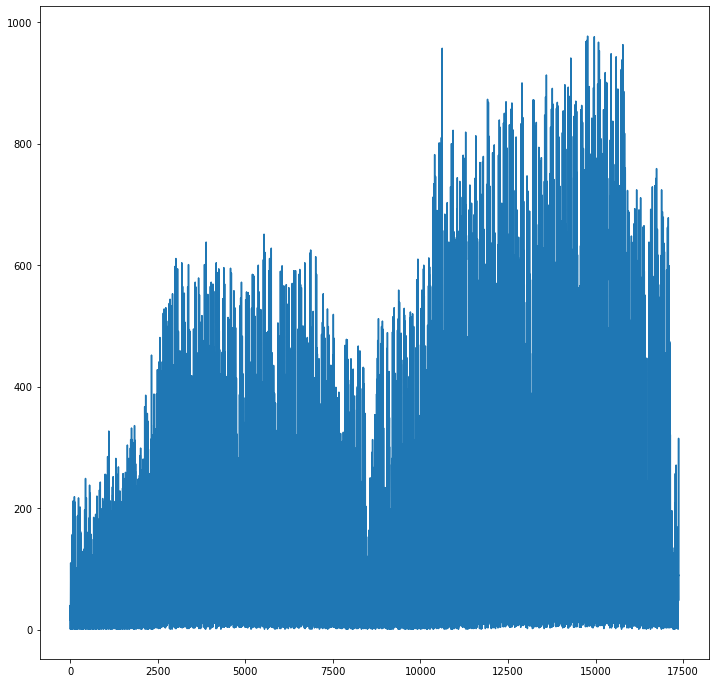

In [640]:
plt.plot(data['count'])
plt.show()

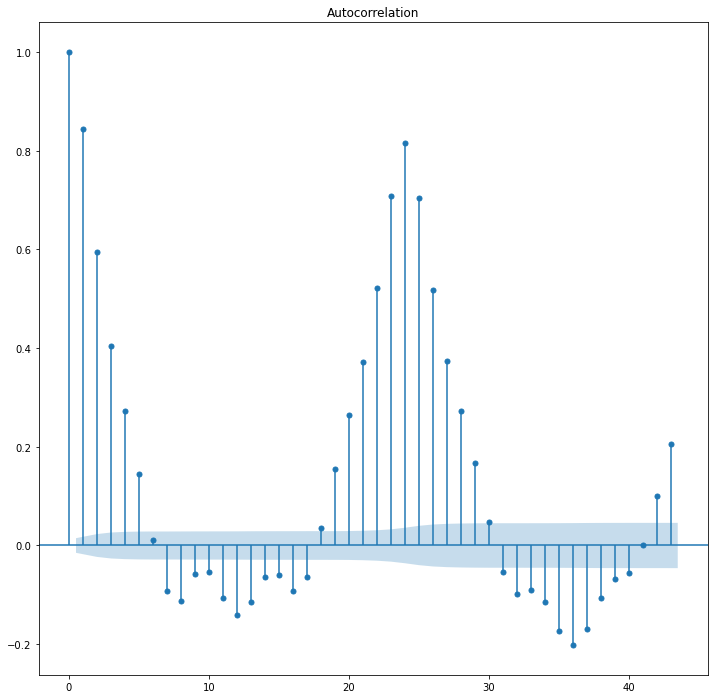

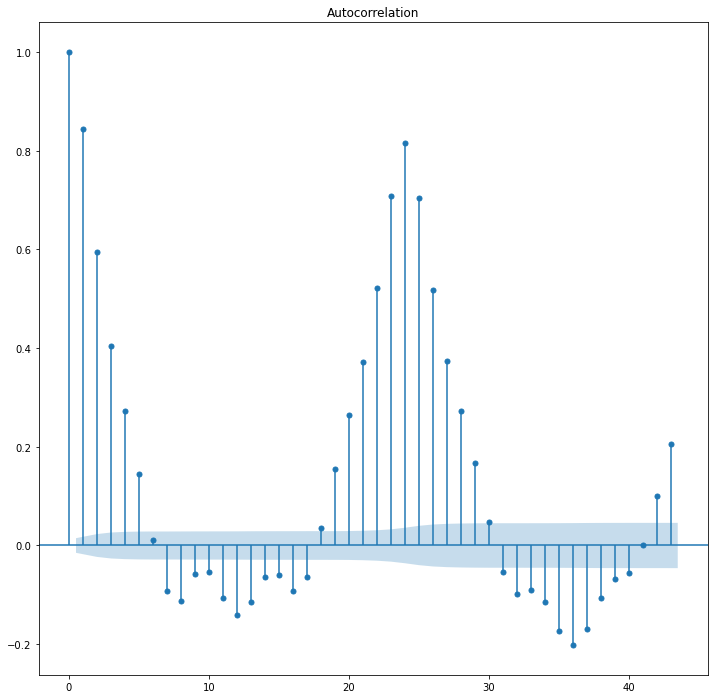

In [641]:
plot_acf(data['count'])

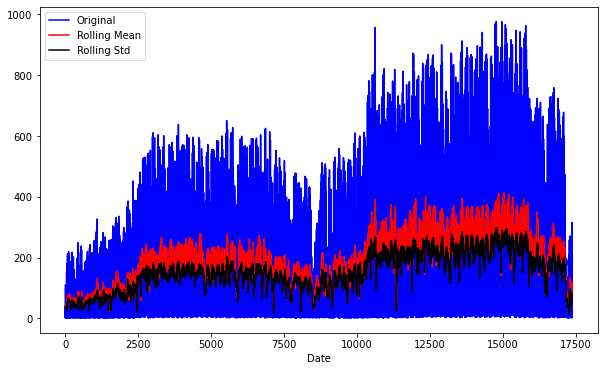

In [642]:
plot_rolling(data['count'], 30)

In [643]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [644]:
data2 = data[['datetime', 'count']].set_index('datetime')
data2['count'] = data2['count'].astype(float)

In [645]:
data2 = data2.asfreq('H', method = 'ffill') # H : Hour / D : Day / W : Week
# asfreq 사용하면 데이터에 존재하지 않았거나 누락되었던 시간도 다 채워준다.
# 결측치 처리를 위해 두가지 방법 존재 : bfill(뒤에 있는 데이터의 값을 그대로 가져와 결측치 채움) / ffill(앞에 있는 데이터로 그대로 결측치를 채움)
data2.head()

,count
datetime,
2011-01-01 00:00:00,16.0
2011-01-01 01:00:00,40.0
2011-01-01 02:00:00,32.0
2011-01-01 03:00:00,13.0
2011-01-01 04:00:00,1.0


seasonal_decompose에서 model parameter는 additive or multiplicative 두 가지를 입력으로 받는다.

- additive : Trend + Seasonal + Residual로 데이터가 구성 되어있다고 가정하고 세 가지 요소로 분리한다.
- Multiplicative : Trend * Seasonal * Residual로 데이터가 구성 되어있다고 가정을 하고 세 가지 요소로 분리한다.

일반적으로 additive가 많이 쓰이고 multiplicative 방식으로 시계열 요소를 분리하는 것은 분리하는 데이터가 백분율 등 비율을 나타내는 경우에 사용된다.

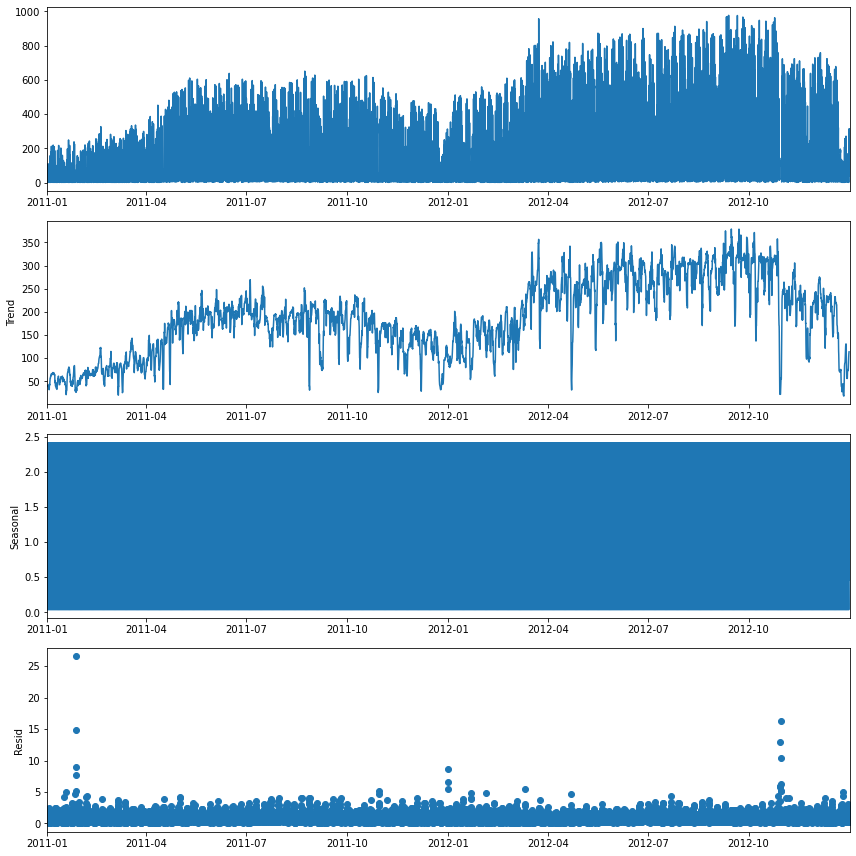

In [646]:
result = seasonal_decompose(data2, model='multiplicative')
result.plot()
plt.show()

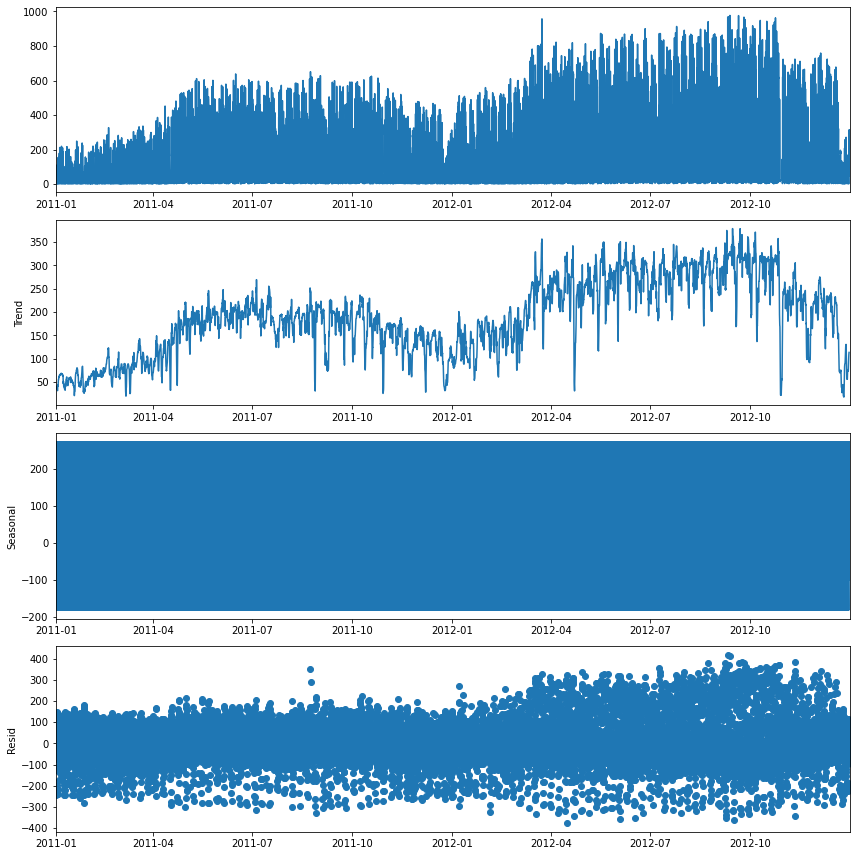

In [647]:
result = seasonal_decompose(data2, model='additive')
result.plot()
plt.show()

두 가지 방식중 additive의 잔차 그래프가 더 적합하므로 additive 방식으로 시계열 요소를 분리하는 것이 적합하다.

In [148]:
data['trend'] = result.trend
data['seasonal'] = result.seasonal
data['resid'] = result.resid
data['d_formed'] = data2['count'] - data2['trend'] - data2['seasonal']

In [473]:
import itertools
from tqdm import tqdm

In [535]:
target = data[['datetime', 'count']]
target.set_index('datetime', inplace = True)
target = target.asfreq('H', method = 'ffill') # H : Hour / D : Day / W : Week

In [577]:
y_train = target.iloc[:17259]
y_test = target.iloc[17260:]

In [500]:
res_diff = sm.tsa.arma_order_select_ic(y_train, max_ar = 7, max_ma = 7, ic = 'aic', trend = 'c')
print('ARMA(p,q) =',res_diff['aic_min_order'],'is the best.')

ARMA(p,q) = (7, 7) is the best.


exog에는 X data를 넣으면 됨. 단순히 y로만 예측할 경우는 None으로 지정

In [579]:
p, q = range(1,3), range(1,3)
d = range(0,1)
P, Q = range(1,3), range(1,3)
D = range(1,2)
m = 12
trend_pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(candi[0], candi[1], candi[2], m) for candi in list(itertools.product(P, D, Q))]
## SARIMAX
AIC = []
SARIMAX_order = []
for trend_param in tqdm(trend_pdq):
    for seasonal_params in seasonal_pdq:
        try:
            result =sm.tsa.SARIMAX(y_train, trend = 'c', 
                                   order = trend_param, seasonal_order = seasonal_params, exog = None).fit()
            print('Fit SARIMAX: trend_order={} seasonal_order={} AIC={}, BIC={}'.format(trend_param, seasonal_params, result.aic, result.bic, end='\r'))
            AIC.append(result.aic)
            SARIMAX_order.append([trend_param, seasonal_params])
        except:
            continue
## Parameter Selection
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0], SARIMAX_order[AIC.index(min(AIC))][1]))

  0%|          | 0/4 [00:00<?, ?it/s]

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=193943.51496542286, BIC=193990.0473263886
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=190411.1030442656, BIC=190465.39079872562


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=191681.20212315847, BIC=191735.4898776185


 25%|██▌       | 1/4 [12:50<38:32, 770.87s/it]

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=190144.53840703744, BIC=190206.58155499178
Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=193818.451174938, BIC=193872.73892939804
Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=190306.07293290278, BIC=190368.11608085711


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=191519.89979061374, BIC=191581.94293856807


 50%|█████     | 2/4 [29:16<29:54, 897.49s/it]

Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=190004.56737448226, BIC=190074.3659159309


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=193797.12193159852, BIC=193851.40968605856


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=190295.33719119808, BIC=190357.3803391524


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=192935.7252488212, BIC=192997.76839677553


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 75%|███████▌  | 3/4 [53:36<19:14, 1154.26s/it]

Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=190032.04611458228, BIC=190101.8446560309


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=193677.0850152278, BIC=193739.12816318215


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=191118.23365312448, BIC=191188.0321945731


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=191641.0501661674, BIC=191710.84870761604


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
100%|██████████| 4/4 [1:14:22<00:00, 1115.73s/it]

Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=190158.45203344873, BIC=190236.00596839163
The smallest AIC is 190004.56737448226 for model SARIMAX(1, 0, 2)x(2, 1, 2, 12)


In [582]:
print(f'ARMA 파라미터는 {SARIMAX_order[AIC.index(min(AIC))][0]}')
print(f'계절성 주기는 {SARIMAX_order[AIC.index(min(AIC))][1]}')

ARMA 파라미터는 (1, 0, 2)
계절성 주기는 (2, 1, 2, 12)


In [583]:
fit_ts_sarimax = sm.tsa.SARIMAX(y_train, trend='c', order=SARIMAX_order[AIC.index(min(AIC))][0], 
                                seasonal_order=SARIMAX_order[AIC.index(min(AIC))][1], exog=None).fit()
display(fit_ts_sarimax.summary())
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(y_test), exog=None).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(y_test), exog=None).conf_int()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                17259
Model:             SARIMAX(1, 0, 2)x(2, 1, 2, 12)   Log Likelihood              -94993.284
Date:                            Thu, 27 May 2021   AIC                         190004.567
Time:                                    18:09:05   BIC                         190074.366
Sample:                                01-01-2011   HQIC                        190027.568
                                     - 12-20-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1110      0.004     26.047      0.000       0.103       0.119
ar.L1          0.5127      0.011     48.603      0.000       0.492       0.533
ma.L1          0.6033      0.012     49.186      0.000       0.579       0.627
ma.L2          0.1586      0.012     13.401      0.000       0.135       0.182
ar.S.L12      -0.8528      0.008   -105.044      0.000      -0.869      -0.837
ar.S.L24       0.1471      0.008     18.128      0.000       0.131       0.163
ma.S.L12      -0.0242      0.019     -1.303      0.193      -0.061       0.012
ma.S.L24      -0.9758      0.018    -53.133      0.000      -1.012      -0.940
sigma2      3535.4073     70.504     50.145      0.000    3397.223    3673.592
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              9131.22
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               2.79   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

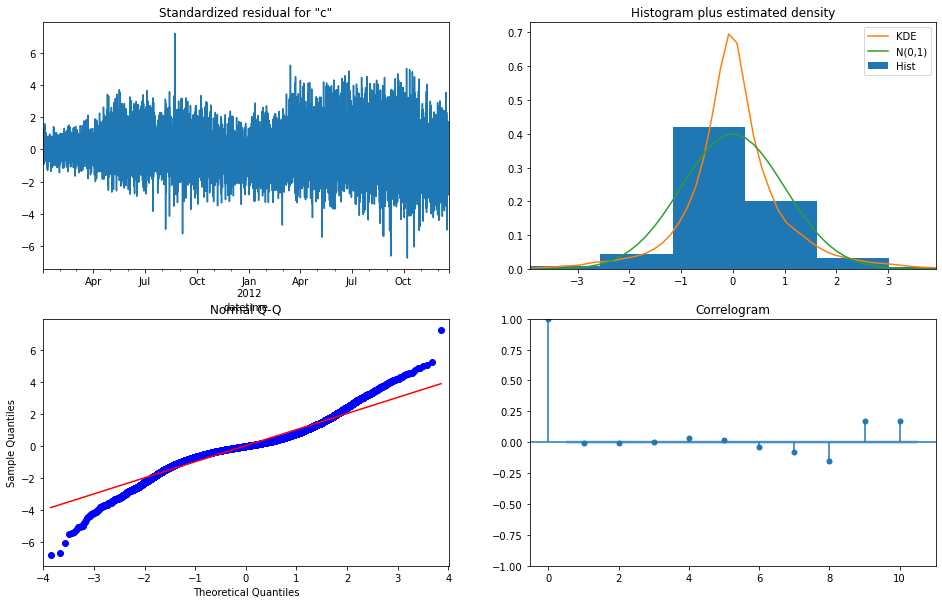

In [584]:
fit_ts_sarimax.plot_diagnostics(figsize = (16,10))
plt.show()

KDE그래프가 N(0,1)과 유사해야 좋음

In [598]:
pred = fit_ts_sarimax.get_prediction(start = y_test.index[0], end = y_test.index[-1], dynamic = True)

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [619]:
pred_119 = fit_ts_sarimax.get_forecast(steps = 285)

In [620]:
pred.predicted_mean

2012-12-20 04:00:00     25.009273
2012-12-20 05:00:00     81.753261
2012-12-20 06:00:00    165.606333
2012-12-20 07:00:00    318.791900
2012-12-20 08:00:00    512.379549
                          ...    
2012-12-31 19:00:00    391.623363
2012-12-31 20:00:00    266.091854
2012-12-31 21:00:00    247.098725
2012-12-31 22:00:00    218.254375
2012-12-31 23:00:00    173.182510
Freq: H, Name: predicted_mean, Length: 284, dtype: float64

In [622]:
pred_119.predicted_mean[1:]

2012-12-20 04:00:00     25.009273
2012-12-20 05:00:00     81.753261
2012-12-20 06:00:00    165.606333
2012-12-20 07:00:00    318.791900
2012-12-20 08:00:00    512.379549
                          ...    
2012-12-31 19:00:00    391.623363
2012-12-31 20:00:00    266.091854
2012-12-31 21:00:00    247.098725
2012-12-31 22:00:00    218.254375
2012-12-31 23:00:00    173.182510
Freq: H, Name: predicted_mean, Length: 284, dtype: float64

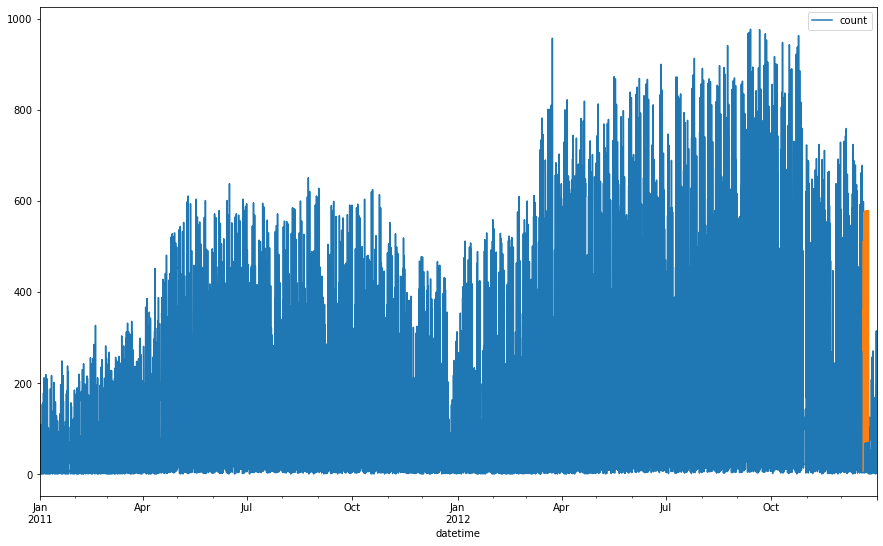

In [602]:
plt.rcParams['figure.figsize'] = (15, 9)
ax = target.plot()
pred_119.predicted_mean.plot(ax = ax)
plt.show()

In [626]:
y_forecasted = pred.predicted_mean

In [627]:
rmse = np.sqrt(mean_squared_error(y_test, y_forecasted))

In [628]:
print(f'SARIMAX 모델의 RMSE는 {rmse}')

SARIMAX 모델의 RMSE는 233.7993820617434


In [629]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(fit_ts_sarimax.resid)

2.0036405852704355

잔차가 2에 가깝기 때문에 자기상관관계를 갖고 있지 않다고 할 수 있다.